In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class', axis=1)

In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
y = df['class']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {'n_estimators':[50, 100], 'learning_rate':[0.1, 0.05, 0.2], 'max_depth':[3, 4, 5]}

In [16]:
gb_model = GradientBoostingClassifier()

In [17]:
grid = GridSearchCV(gb_model, param_grid)

In [18]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [19]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [20]:
predictions = grid.predict(X_test)

In [21]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [22]:
grid.best_estimator_

GradientBoostingClassifier()

In [23]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [25]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 3.98193855e-16, 0.00000000e+00, 0.00000000e+00,
       8.31945671e-17, 1.04652037e-03, 0.00000000e+00, 3.78276239e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.26436403e-17,
       3.06865230e-17, 0.00000000e+00, 0.00000000e+00, 2.22085610e-08,
       2.31055039e-03, 5.38714526e-02, 1.84253604e-04, 2.10752239e-02,
       1.82499853e-02, 1.21451778e-03, 6.14744334e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.04355233e-02, 0.00000000e+00, 1.68817645e-16, 0.00000000e+00,
       3.36043331e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.64042355e-17, 0.00000000e+00, 1.18409690e-18, 2.62169490e-18,
       2.03408198e-04, 7.05927414e-04, 1.35970285e-01, 7.71855052e-03,
       2.86563228e-02, 3.93056884e-03, 6.65932824e-06, 1.15245842e-04,
       3.60117275e-05, 1.06382229e-03, 3.75222573e-02, 1.82087060e-04,
       0.00000000e+00, 0.00000000e+00, 1.17280174e-04, 0.00000000e+00,
      

In [26]:
feat_import = grid.best_estimator_.feature_importances_

In [27]:
imp_feat = pd.DataFrame(index=X.columns, data=feat_import, columns=['Importance'])

In [29]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005]

In [30]:
imp_feat

,Importance
cap-surface_g,0.001047
cap-color_y,0.002311
bruises_t,0.053871
odor_f,0.021075
odor_l,0.018250
odor_m,0.001215
odor_n,0.614744
odor_p,0.000921
gill-spacing_w,0.012509
gill-size_n,0.010436


In [ ]:
imp_feat

<Axes: ylabel='Importance'>

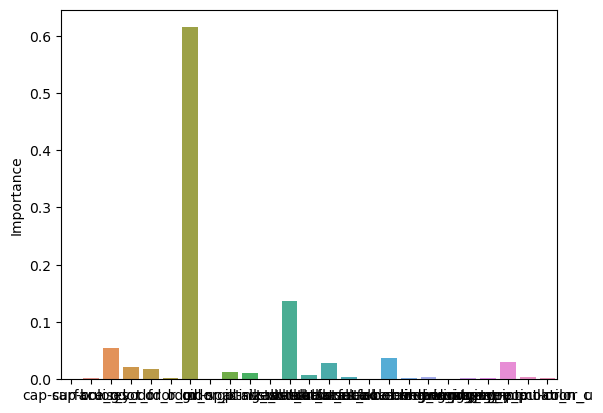

In [31]:
sns.barplot(data=imp_feat, x=imp_feat.index, y='Importance')